In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

### Mengubah Parameter Default Matplotlib

In [4]:
rcParams['figure.figsize'] = 20,10
rcParams['lines.linewidth'] = 2.5
# rcParams['xticks.rotation'] = 25
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# **Dataset yang digunakan**

### **Holiday Package Prediction**



- **Deskripsi:**
    Dataset ini diapakai untuk memprediksi apakah customer akan mengambil packages baru yang akan di launchin oleh "Trips&Travel.com".
- **Data:**
    Setiap baris mewakili pelanggan, setiap kolom berisi atribut pelanggan
    informasi dari pitch, serta target variabelnya.
- **Link download [disini](https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction/download?datasetVersionNumber=1)**

**Parameter :**

- `Customer ID` : Unique identifier assigned to each customer
- `ProdTaken` : Wether the customer take the packages (**Yes**) or not (**No**)
- `Age` : Age of customer
- `TypeOfContact` : How Customer was contacted (Company Invited or Self Inquiry)
- `CityTier` : City tier depends on the development of a city, population facilities, and living standards. The categories are ordered i.e.
- `DurationOfPitch` : Duration of the pitch by a salesperson to the customer
- `Occupation` : Occupation of the customer
- `Gender` : is male or female
- `NumberOfPerson` : Total Number of Persons Planning to take the trip with the customer
- `NumberOfFollowup` : Total number of follow-ups has been done by the salesperson after sales pitch
- `ProductPitched` : Product pitched by the salesperson
- `PreferredProperty` : Preferred Hotel property rating by customer (**3-5**)
- `MaritalStatus` : Marital Status of Customer (**Married, Divorced, Unmarried**)
- `NumberOfTrips` : Average Number of trips in a year by customer
- `Passport` : has Passport **(Yes)** or no Passport **(No)**
- `PitchSatisfaction` : Sales pitch satisfaction score (**1-5**)
- `OwnCar` : has Car **(Yes)** or not **(No)**
- `NumberOfChildren` : Total number of children with age less than 5 planning to take the trip with the customer
- `Designation` : Designation of the customer in the current organization
- `MonthlyIncome` : Gross monthly income of the customer 

### Load Dataset

In [5]:
df = pd.read_csv('Travel.csv')
df.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
# df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/Travel.csv')
# df.head()

## Descriptive Statistics

In [6]:
rows = df.shape[0]
cols = df.shape[1]

print(f'''this dataset has {rows} rows''')
print(f'''this dataset has {cols} columns''')

this dataset has 4888 rows
this dataset has 20 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

data tersebut memiliki jumlah kolom 20 columns,dan bari 4888 row. Terdapat beberapa kolom yang memiliki missing value, yaitu kolom-kolom dengan jumlah baris yang kurang dari 4888, dan mempunyai type data int64, float64, serta object

In [8]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

Dapat dilihat bahwa terdapat data yang kosong (missing value) pada beberapa kolom data tersebut, seperti kolom `Age`,`TypeofContact`,`DurationOfPitch`,`NumberOfFollowups`,`PreferredPropertyStar`,`NumberOfTrips`,`NumberOfChildrenVisiting`,`MonthlyIncome`

In [9]:
#memisahkan data numerical
num_dtypes = ['int64', 'float64']
num_df = df.select_dtypes(include = num_dtypes)
nums = num_df.columns

print(nums)

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')


In [10]:
#memisahkan data categorical
cat_dtypes = ['object']
cat_df = df.select_dtypes(include = cat_dtypes)
cats = cat_df.columns

print(cats)

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')


Untuk type data dari data yang dimiliki sudah sesuai, terdapat 2 jenis type data dalam data tersebut yaitu:<br> a. numeric(Type int dan float): `CustomerID`, `ProdTaken`, `Age`, `CityTier`, `DurationOfPitch`, `NumberOfPersonVisiting`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, `Passport`, `PitchSatisfactionScore`, `OwnCar`, `NumberOfChildrenVisiting`, `MonthlyIncome`.
<br>b. kategorical(type data object): `TypeofContact`, `Occupation`, `Gender`, `ProductPitched`,`MaritalStatus`, `Designation`.

In [11]:
df[nums].describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [12]:
df[cats].describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


In [13]:
for col in cats:
  print(f'''Value count kolom {col}:''')
  print(df[col].value_counts())
  print('--------------------------------')
  print()

Value count kolom TypeofContact:
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------

Value count kolom Occupation:
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------

Value count kolom Gender:
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------

Value count kolom ProductPitched:
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
--------------------------------

Value count kolom MaritalStatus:
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
--------------------------------

Value count kolom Designation:
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Na

Dapat dilihat pada kolom `Gender` memiliki unique value 3, dan ini tidak sesuai. Kemudian ketika dilihat ternyata terdapat beberapa value yang mengisi typo dan mengakibatkan bernilai unique. dilihat bahwa sebenarnya Fe Male dan Female merupakan jenis yang sama. Maka disini kita perlu untuk melakukan cleansing data untuk menggabungkan 2 unique tersebut. Sehingga unique yang dimiliki kolom `Gender` hanya bernilai 2 unique.

Selain itu pada Column `MaritalStatus` terdapat 2 Value yang dapat diasumsikan sama, yaitu, Single da Unmarried.

In [14]:
print(f'''This dataset has {df.duplicated().sum()} duplicate data''')

This dataset has 0 duplicate data


### Univariate Analysis

Numerical Collumns

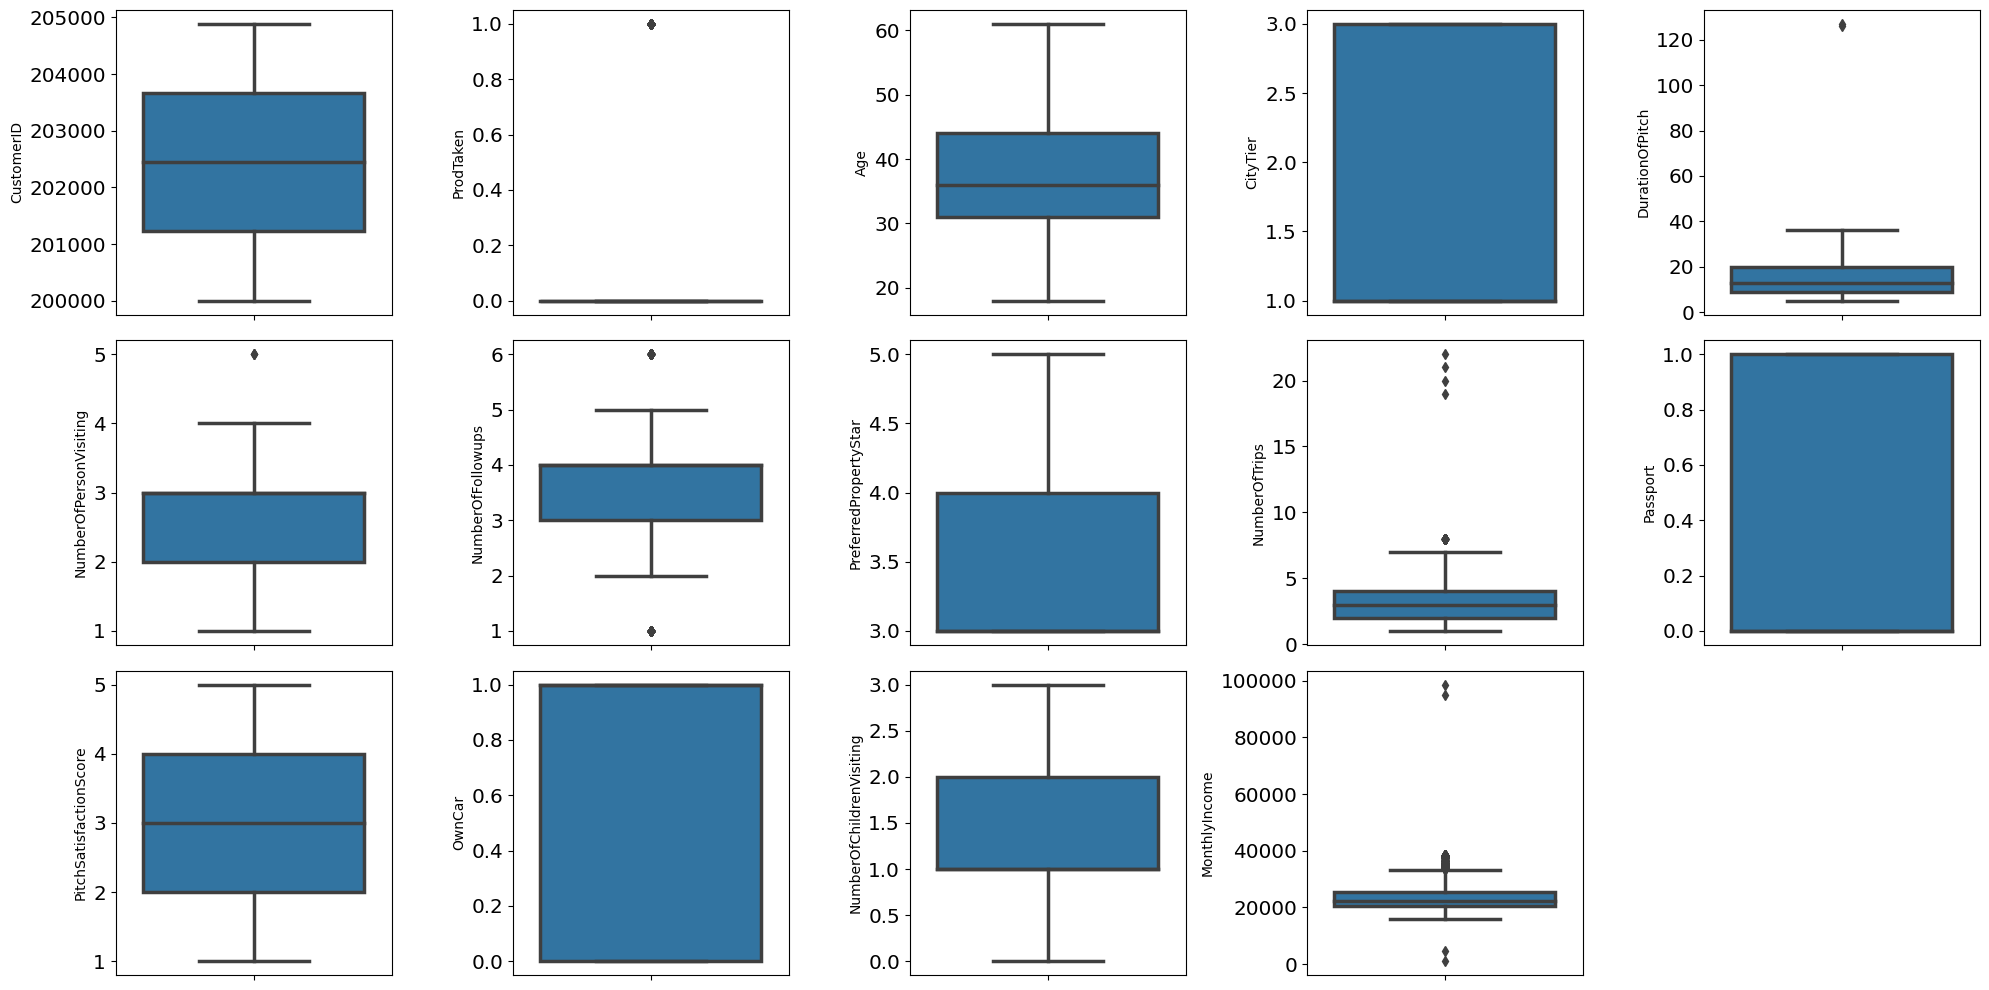

In [15]:
for i in range(0, len(nums)):
  plt.subplot(3,5,i+1)
  sns.boxplot(y=df[nums[i]],orient='v')
  plt.tight_layout()

Dari plot diatas, didapatkan bahwa:
- Pada fitur `ProdTaken` `DurationOfPitch` `NumberOfPersonVisiting` terdapat 1 outlier
- pada fitur `NumberOfFollowups` terdapat 2 outlier
- pada fitur `NumberOfTrips` terdapat 5 outlier 
- pada fitur `MonthlyIncome` terdapat 4 outlier

Terdapat beberapa fitur diatas yang memiliki outlier, maka disarankan untuk melakukan transformasi data menggunakan log transform pada tahap pre-processing. Transformasi ini dapat membantu mengurangi dampak outlier pada distribusi data.

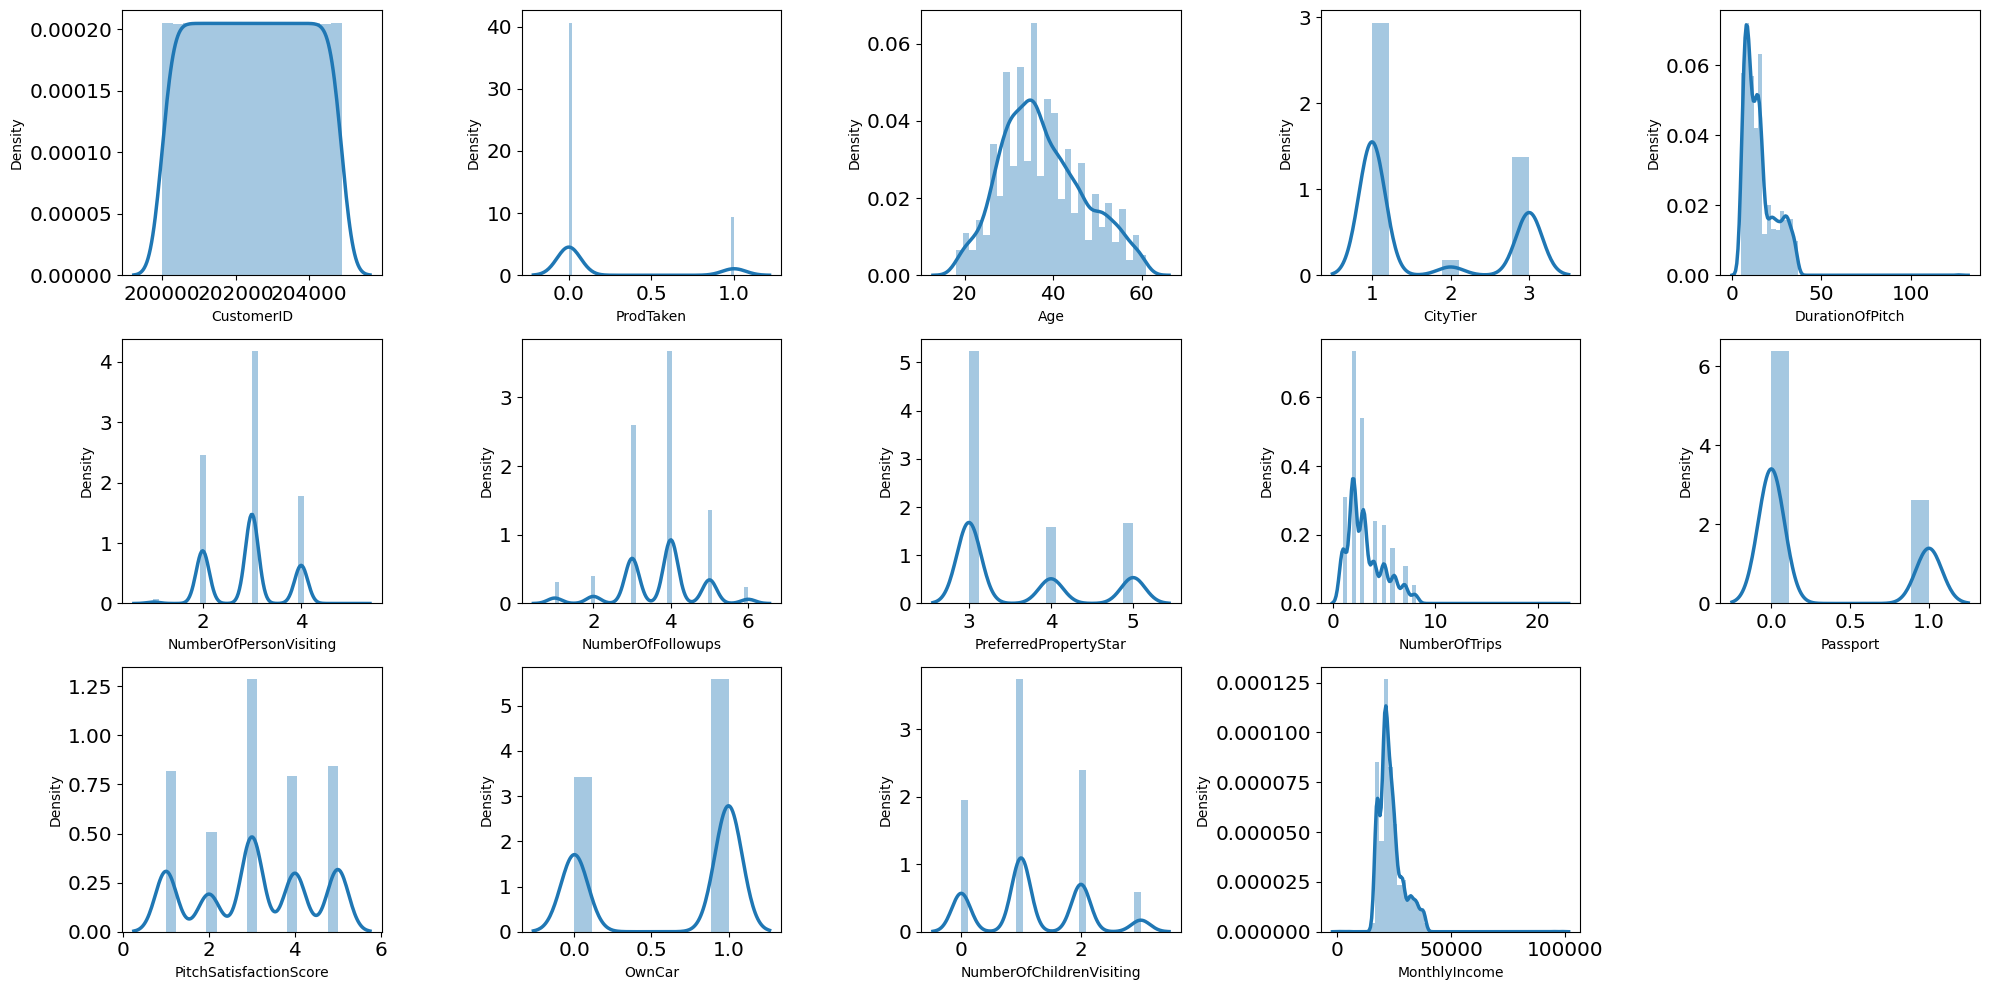

In [16]:
for i in range(0, len(nums)):
  plt.subplot(3,5,i+1)
  sns.distplot(df[nums[i]])
  plt.tight_layout()

Dari plot diatas, didapatkan bahwa:
- `Age` : Distribusi normal
- `DurationOfPitch` `NumberOfTips` `MonthlyIncome` : Positively Skewed
- `OwnCar` `Passport` `ProdTaken` : Bimodal
- `NumberOfPersonVisiting` `City Tier` `PreferredPropertyStar`: Trimodal

Data dengan positively skewed cenderung memiliki ekor panjang di sebelah kanan distribusi, yang memungkinkan adanya outlier, maka dari itu kita dapat mencoba beberapa transformasi misalnya log transform dan melakukan normalisasi data dengan melakukan Z-Score untuk mengurangi mean dan membaginya dengan standar deviasi. Normalisasi berguna dalam memastikan data yang dimiliki skala nya seragam

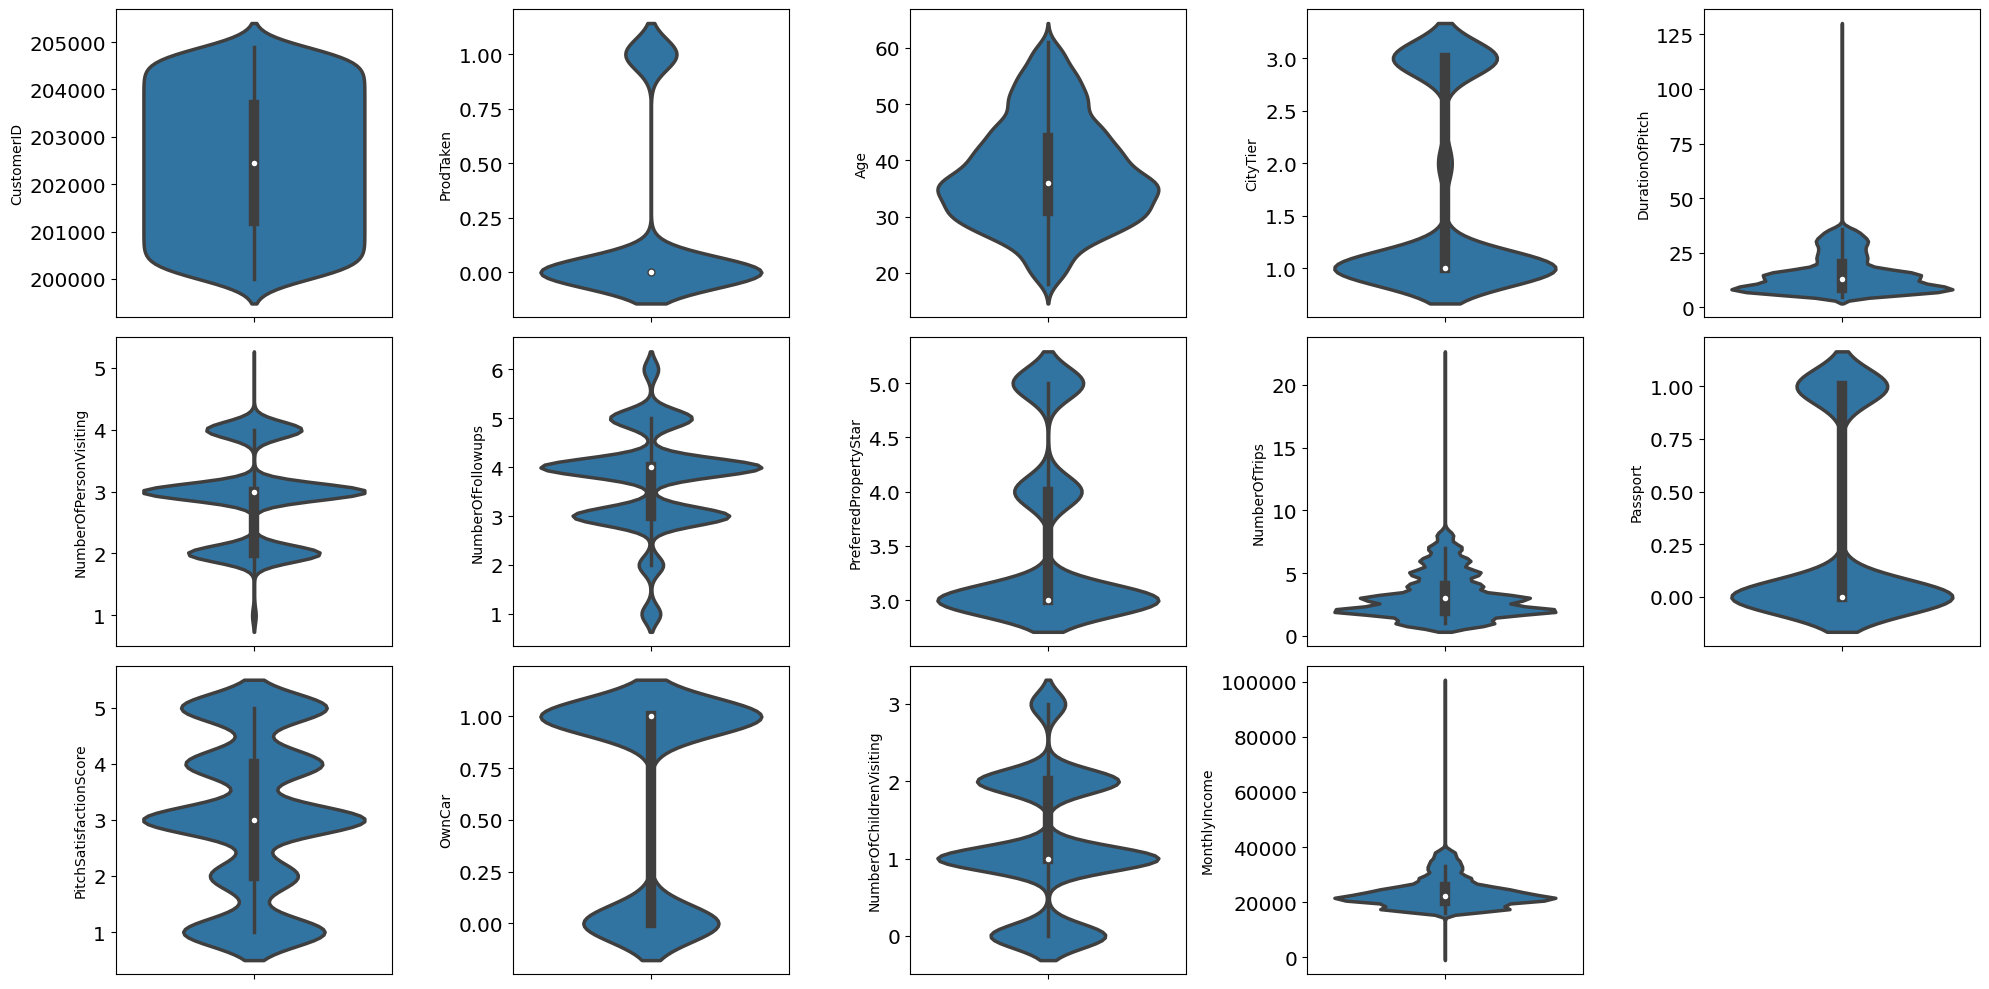

In [17]:
for i in range(0, len(nums)):
  plt.subplot(3, 5, i+1)
  sns.violinplot(y=df[nums[i]], orient = 'v')
  plt.tight_layout()

Categorical Collumn

In [ ]:
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.barplot(x=df[cats[i]].value_counts().index, y=df[cats[i]].value_counts())
    plt.xticks(rotation =30)
    plt.tight_layout()

Dari grafik diatas, didapatkan bahwa:
- Pada fitur `Occupation` kategori Free lancer mengalami ketimpangan, hal ini dapat menyebabkan bias dalam interpretasi hasil. Maka sebaiknya kita melakukan transformasi data pada tahap pre-processing.
- pada fitur `MaritalStatus` kategori Unmarried dengan Single dapat diasumsikan sama, sehingga pada proses preprocessing dapat di gabung menjadi 1 kategorik saja.
- terdapat keselahan penulisan pada fitur `Gender`, 'Fe Male' yang menyebabkan terbagi dua-nya value pada 'Female'  

### Multivariate Analysis

Correaltion Analysis

In [ ]:
df.info()

In [ ]:
cats = ['CustomerID','ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'Designation']
nums = ['Age', 'DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']

for cat in cats:
    df[cat] = df[cat].astype("category")

In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari grafik diatas, didapatkan bahwa:

- Kolom `Age` dengan `DurationOfPitch` dan `NumberOfFollowups` memiliki korelasi negatif lemah

- Kolom `Age` memiliki nilai korelasi positif tinggi (mendekati 0.7), nantinya dapat digabung menjadi fitur baru

- Kolom `MonthlyIncome` memiliki korelasi negatif lemah terhadap kolom `DurationOfPitch`

Selain Fitur diatas, menunjukkan tidak adanya korelasi antar fitur lainnya.

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, col in enumerate(nums):
  ax = axes.flatten()[i]
  sns.violinplot(data = df, x =df['ProdTaken'], y=col,ax = ax)
  ax.set_title(f'Distribution of {col}', fontsize=12)
  ax.set_ylabel('')
  plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(3,4, figsize=(20,10))
for i, col in enumerate(cats[2:]):
    ax = axes.flatten()[i]
    sns.countplot(data=df, x=col, hue='ProdTaken', ax=ax)
    ax.set_title(f'{col}', fontsize=12)
    ax.set_ylabel('')
fig.tight_layout()
fig.subplots_adjust(top=0.93)

### **Data Cleansing (simple)**

1. handling missing value<br>
2. handling inconsistent data (typo)<br>
3. handling duplicate data

In [18]:
df_simp = df.copy()
df_simp

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [19]:
# Handling Missing Values

## Age --> Median
age_mean = df_simp['Age'].mean()
df_simp['Age'] = df_simp['Age'].replace({np.nan: age_mean})

## TypeOfContact --> Self Enquiry
df_simp['TypeofContact'].fillna('Self Enquiry', inplace=True)

## DurationOfPtch --> Median
dop_median = df_simp['DurationOfPitch'].median()
df_simp['DurationOfPitch'] = df_simp['DurationOfPitch'].replace({np.nan: dop_median})

## NumberOfFollowups --> Median
NOF_median = df_simp['NumberOfFollowups'].median()
df_simp['NumberOfFollowups'] = df_simp['NumberOfFollowups'].replace({np.nan: NOF_median})

## PrefferedPropertyStar --> 4
df_simp['PreferredPropertyStar'].fillna('4', inplace=True)

## NumberOfTrips --> Median
NOT_median = df_simp['NumberOfTrips'].median()
df_simp['NumberOfTrips'] = df_simp['NumberOfTrips'].replace({np.nan: NOT_median})

## NumberOfChildren --> Modus
NCV_mode = df_simp['NumberOfChildrenVisiting'].mode()[0]
df_simp['NumberOfChildrenVisiting'] = df_simp['NumberOfChildrenVisiting'].replace({np.nan: NCV_mode})

## MonthlyIncome --> Median
MonthlyIncome_median = df_simp['MonthlyIncome'].median()
df_simp['MonthlyIncome'] = df_simp['MonthlyIncome'].replace({np.nan: MonthlyIncome_median})

print("Jumlah nilai kosong:")
print(df_simp.isnull().sum())

Jumlah nilai kosong:
CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64


In [20]:
# Handling Inconsistent data

## Fe Male --> Female
df_simp['Gender'] = df_simp['Gender'].apply(lambda x: 'Female' if x == 'Fe Male' else x)

## Single --> Unmarried
df_simp['MaritalStatus'] = df_simp['MaritalStatus'].apply(lambda x: 'Unmarried' if x == 'Single' else x)

## type Age --> integer (menghindari koma pada umur)
df_simp['Age'] = df_simp['Age'].astype('int')

In [21]:
print(f'''setelah data cleanse, dataset memiliki {df_simp.shape[0]} Rows dan {df_simp.shape[1]} columns''')

setelah data cleanse, dataset memiliki 4888 Rows dan 20 columns


### **Business Insight**

In [ ]:
colors = ['orangered', 'deepskyblue', 'yellowgreen', 'violet', 'thistle']

Percentage_Purchase_Gender = (df_simp.groupby('Gender')['ProdTaken'].mean()) * 100

labels = Percentage_Purchase_Gender.index
sizes = Percentage_Purchase_Gender.values

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = plt.bar(labels, sizes, color = colors)
for p in ax:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.annotate(percentage,
                 xy=(x, y),
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10)

plt.xlabel("Gender")
plt.ylabel("Persentase Pembelian Produk (%)")
plt.title("Persentase Pembelian Produk berdasarkan Gender")
plt.ylim(0.0, 100.0)

plt.subplot(1, 2, 2)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors)
plt.title("Perbandingan Pembelian Produk berdasarkan Gender")
plt.axis('equal')

plt.tight_layout()
plt.show()

Jika dibandingkan berdasarkan gender maka dapat dilihat bahwa Male lebih cenderung membeli produk tersebut dibandingkan dengan female. Lebih lanjut **Male memiliki porsi sebesar 53,3% diatas female yang memiliki 46,7%**

In [ ]:
Percentage_Purchase_ToC = df_simp.groupby('TypeofContact')['ProdTaken'].mean()*100

labels = Percentage_Purchase_ToC.index
sizes = Percentage_Purchase_ToC.values

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
ax = plt.bar(labels, sizes, color = colors)
for p in ax:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.annotate(percentage,
                 xy=(x, y),
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10)

plt.xlabel("Type of Contact")
plt.ylabel("Percentage of Product Purchases (%)")
plt.title("Percentage of Product Purchases by Type of Contact")
plt.ylim(0.0, 100.0)

plt.subplot(1, 2, 2)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors)
plt.title("Perbandingan Pembelian Produk berdasarkan Type of Contact")
plt.axis('equal')

plt.tight_layout()
plt.show()

Jika dibandingkan berdasarkan Type of Contact maka dapat dilihat bahwa Company Invited lebih banyak membeli produk tersebut dibanding self inquiry. **Company invited memiliki porsi sebesar 54,7% diatas Self Enquiry yang memiliki 45,3%**

In [ ]:
Percentage_Purchase_Occupation = df_simp.groupby('Occupation')['ProdTaken'].mean()*100


labels = Percentage_Purchase_Occupation.index
sizes = Percentage_Purchase_Occupation.values

plt.figure(figsize=(15, 7))

ax = plt.bar(labels, sizes, color = colors)
for p in ax:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.annotate(percentage,
                 xy=(x, y),
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10)

plt.xlabel("Occupation")
plt.ylabel("Percentage of Product Purchases (%)")
plt.title("Percentage of Product Purchases by Occupation")



plt.show()

Jika dibandingkan berdasarkan Occupation maka dapat dilihat bahwa Free Lancer memiliki 100% product purchase, jauh diatas dibandingkan dengan Large Business, Salaried dan Small Business. Free Lancer sendiri memiliki pangsa pasar sebesar 61.1% lebih besar dari pangsa pasar gabungan Large Business, Salaried dan Small Business.

In [ ]:
## menentukan Min dan Mx dari usia
age_min = df_simp['Age'].min()
age_max = df_simp['Age'].max()

## lebar dari klasifikasinya
lebar = (age_max - age_min) / 4

## Fungsi untuk pengelompokkan umur
def age_cats(age):
    if age <= age_min + lebar:
        return "18-29"
    elif age <= age_min + 2 * lebar:
        return "30-41"
    elif age <= age_min + 3 * lebar:
        return "42-53"
    else:
        return "54-61"

df_simp['class_age'] = df['Age'].apply(age_cats)

In [ ]:
Percentage_Purchase_age = df_simp.groupby('class_age')['ProdTaken'].mean() * 100

labels = Percentage_Purchase_age.index
sizes = Percentage_Purchase_age.values

plt.figure(figsize=(15, 7))

ax = plt.bar(labels, sizes, color=colors)
for p in ax:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.annotate(percentage,
                 xy=(x, y),
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10)

plt.xlabel("Age Classification")
plt.ylabel("Percentage of Product Purchases (%)")
plt.title("Percentage of Product Purchases by Age Classification")
plt.ylim(0, 100)

plt.show()


kelompok usia yang memiliki presentase terbesar untuk mengambil produk setelah pitch produk oleh sales adalah kelompok usia 18-29 tahun (32.1%). "Travel&Trips.com" dapat lelbih berfokus pada kelompok usia ini untuk pitch product terbaru mereka untuk merendahkan cost marketing.

In [ ]:
Percentage_Purchase_Occupation = df_simp.groupby(['Occupation', 'ProdTaken'])['ProdTaken'].count()

Percentage_Purchase_Occupation

In [ ]:
df_simp['Occupation'].value_counts()

In [ ]:
# ===================================================== Marital Status & Product Taken ========================================================

prodtaken_marital=df_simp.groupby('MaritalStatus').agg({'ProdTaken':'sum'}).reset_index()
sum_prodtaken=sum(df_simp.groupby('MaritalStatus')['ProdTaken'].sum())

#make plots
plt.figure(figsize=(8,5))
colors = ['orangered', 'deepskyblue', 'yellowgreen', 'violet', 'thistle']
ax=sns.barplot(x='MaritalStatus',y='ProdTaken',data=prodtaken_marital, palette=colors)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/sum_prodtaken)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate('{} ({})'.format(p.get_height(), percentage),
                xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                xytext=(0,1),  # 1 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10,
                bbox=dict(facecolor='white', edgecolor="None", pad=2)
               )
#set labels
plt.xlabel('Status Perkawinan', fontsize=13, labelpad=10)
plt.ylabel('Jumlah Produk Terjual', fontsize=13, labelpad=10)
plt.title('Total Penjualan Produk Berdasarkan Status Pernikahan', 
             fontsize=15, fontweight='bold', pad=25)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = 'Mayoritas customer yang membeli package memiliki status Married dan Unmarried'
ax.text((x_start+x_end)/2, y_end*1.03, desc,
        ha = 'center',fontsize = 11,  alpha = 0.75)

# ===================================================== Product Pitched & Product Taken ========================================================

df_pitchedtaken=df_simp.groupby('ProductPitched').agg({'ProdTaken':'sum'}).reset_index()
sum_pitchedtaken=sum(df_simp.groupby('ProductPitched')['ProdTaken'].sum())

#make plots
plt.figure(figsize=(8,5))
ax=sns.barplot(x='ProductPitched',y='ProdTaken',data=df_pitchedtaken,palette=colors)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/sum_pitchedtaken)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate('{} ({})'.format(p.get_height(), percentage),
                xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                xytext=(0,1),  # 1 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10,
                bbox=dict(facecolor='white', edgecolor="None", pad=2)
               )
#set labels
plt.xlabel('Jenis Package', fontsize=13, labelpad=10)
plt.ylabel('Jumlah Package Terjual', fontsize=13, labelpad=10)
plt.title('Total Package Terjual Berdasarkan Jenisnya', 
             fontsize=15, fontweight='bold', pad=25)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = 'Mayoritas package yang dibeli oleh customers adalah tipe Basic, Deluxe, dan Standard'
ax.text((x_start+x_end)/2, y_end*1.03, desc,
        ha = 'center',fontsize = 11,  alpha = 0.75)

# ===================================================== Designation & Product Taken ========================================================

df_designationtaken=df_simp.groupby('Designation').agg({'ProdTaken':'sum'}).reset_index()
sum_designationtaken=sum(df_simp.groupby('Designation')['ProdTaken'].sum())

#make plots
plt.figure(figsize=(8,5))
ax=sns.barplot(x='Designation',y='ProdTaken', data=df_designationtaken, palette=colors)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/sum_designationtaken)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate('{} ({})'.format(p.get_height(), percentage),
                xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                xytext=(0,1),  # 1 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10,
                bbox=dict(facecolor='white', edgecolor="None", pad=2)
               )
#set labels
plt.xlabel('Jabatan Pekerjaan', fontsize=13, labelpad=10)
plt.ylabel('Jumlah Package Terjual', fontsize=13, labelpad=10)
plt.title('Total Package Terjual Berdasarkan Jenisnya', 
             fontsize=15, fontweight='bold', pad=25)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = 'Mayoritas customers yang membeli package memiliki jabatan Executive, Manager dan Senior Manager'
ax.text((x_start+x_end)/2, y_end*1.03, desc,
        ha = 'center',fontsize = 11,  alpha = 0.75)
plt.show()

Berdasarkan beberapa grafik di atas, dapat disimpulkan bahwa:
- Package yang ditawarkan oleh perusahaan Travel&Trips.com banyak dibeli oleh customer yang memiliki jabatan sebagai executive, manager dan senior manager, serta customers yang berstatus menikah (Married) dan Tidak Menikah (Unmarried). Tidak ada customer berstatus single yang membeli package yg ditawarkan. 
- Package yang paling digemari (Banyak dibeli) oleh customers adalah package Basic, Deluxe, dan Standard

Rekomendasi untuk Bisnis:
- Untuk efisiensi marketing cost, perusahaan Travel&Trips.com bisa melakukan targeted marketing dengan berfokus pada customer/calon customer yang paling potensial untuk membeli package yang ditawarkan, yaitu customer yang memiliki jabatan sebagai executive, manager dan senior manager, serta customers yang berstatus menikah (Married), belum menikah (Single) dan Tidak Menikah (Unmarried) terlebih dahulu sebelum menawarkan kepada customer lain. Hal tersebut dikarenakan data perusahaan menunjukkan bahwa package yang ditawarkan perusahaan hanya sesuai dengan preferensi customer2 tersebut tetapi kurang sesuai dengan customer dengan kriteria lainnya.

## Data Preprocessing

### data cleanse

Memakai `df_simp` yang sudah di clease sebelumnya untuk melakukan visualisasi business insight

In [ ]:
df_simp.head()

In [ ]:
df_simp.info()

In [ ]:
df_simp.describe()

#### Handling Outlier

In [22]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_simp)}')

filtered_entries = np.array([True] * len(df_simp))

for col in ['Age','DurationOfPitch','NumberOfTrips','NumberOfFollowups', 'MonthlyIncome']:
    zscore = abs(stats.zscore(df_simp[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_simp = df_simp[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_simp)}')

Jumlah baris sebelum memfilter outlier: 4888
Jumlah baris setelah memfilter outlier: 4878


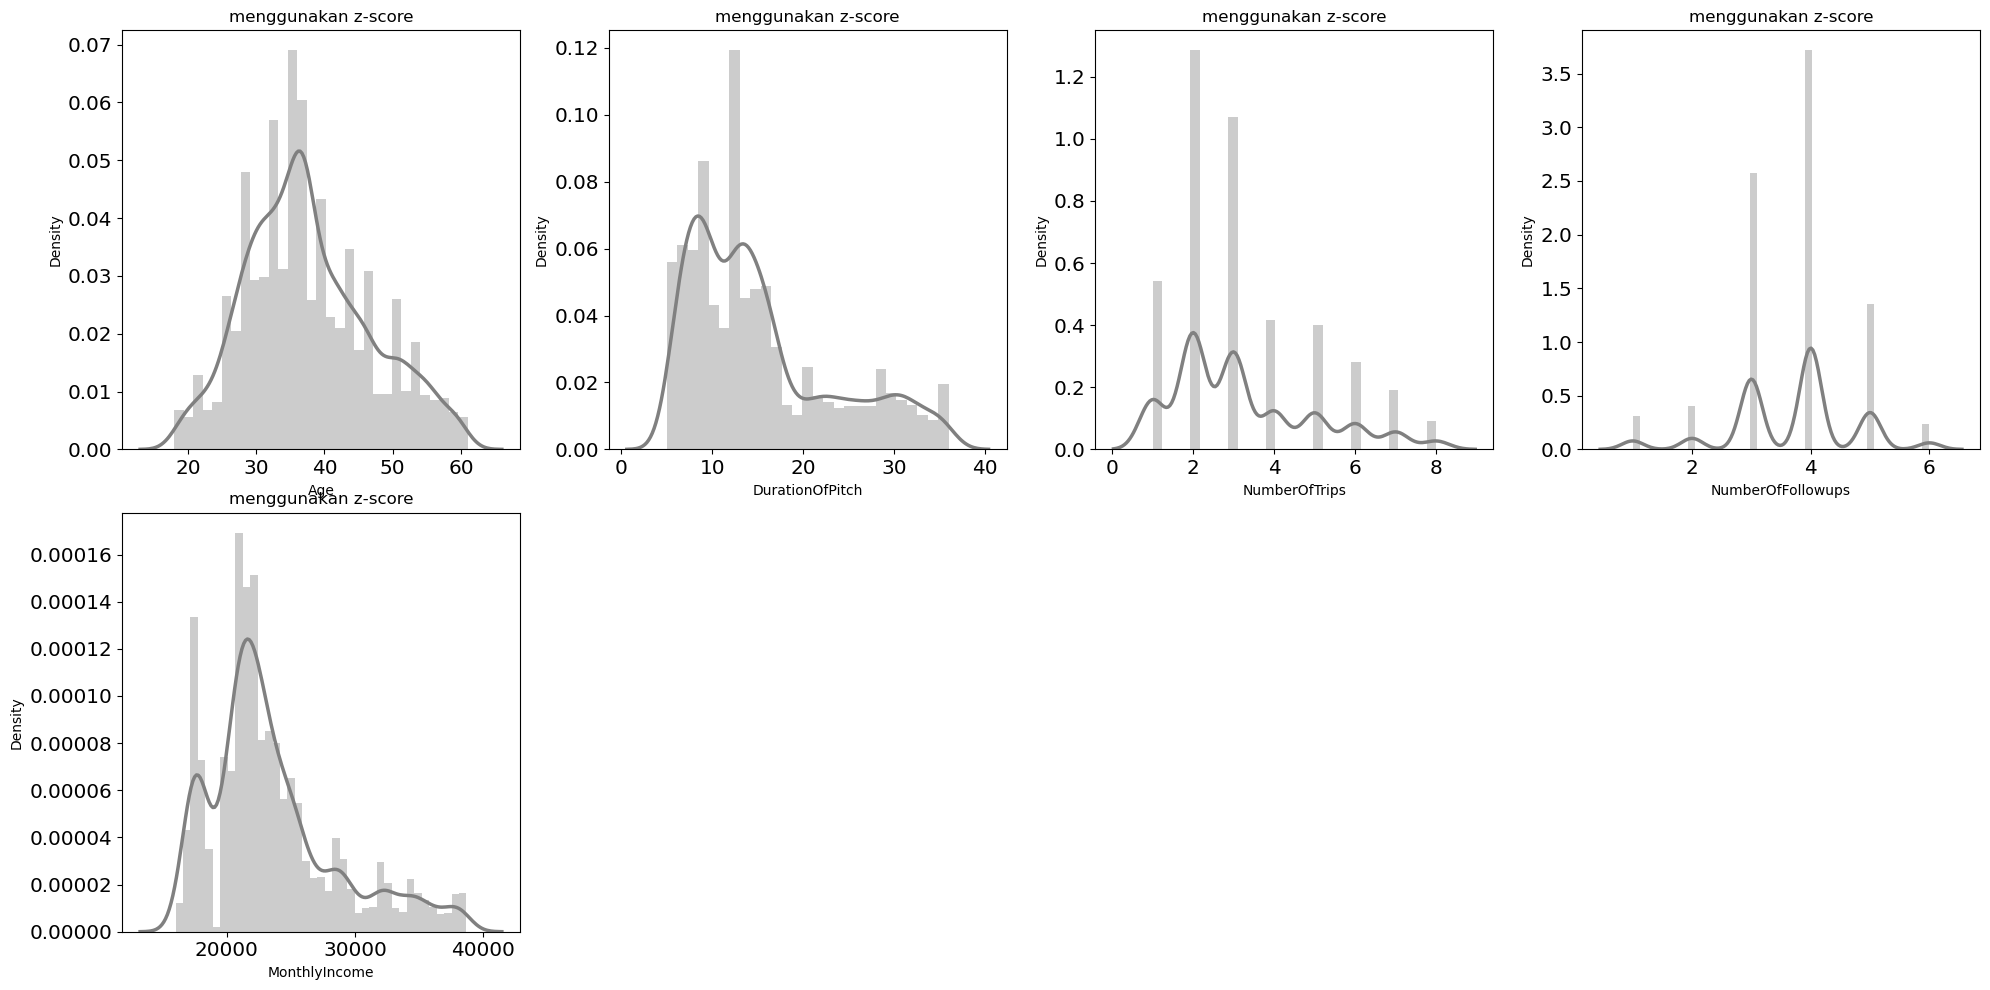

In [23]:
nums = ['Age', 'DurationOfPitch', 'NumberOfTrips', 'NumberOfFollowups','MonthlyIncome']

for i in range(len(nums)):
    plt.subplot(2, 4, i+1)
    sns.distplot(df_simp[nums[i]], color='gray')
    plt.tight_layout()
    plt.title("menggunakan z-score")


In [24]:
#memisahkan data categorical
cat_dtypes = ['object', 'category']
cat_df_simp = df_simp.select_dtypes(include = cat_dtypes)
cats = cat_df_simp.columns

print(cats)

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'Designation'],
      dtype='object')


In [25]:
#memisahkan data numerical
num_dtypes = ['int64', 'float64']
num_df_simp = df_simp.select_dtypes(include = num_dtypes)
nums = num_df_simp.columns

print(nums)

Index(['CustomerID', 'ProdTaken', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')


In [26]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df_simp[col].value_counts())
    print('--------------------------------')
    print()

Value count kolom TypeofContact:
Self Enquiry       3465
Company Invited    1413
Name: TypeofContact, dtype: int64
--------------------------------

Value count kolom Occupation:
Salaried          2362
Small Business    2084
Large Business     430
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------

Value count kolom Gender:
Male      2910
Female    1968
Name: Gender, dtype: int64
--------------------------------

Value count kolom ProductPitched:
Basic           1836
Deluxe          1728
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
--------------------------------

Value count kolom PreferredPropertyStar:
3.0    2987
5.0     955
4.0     911
4        25
Name: PreferredPropertyStar, dtype: int64
--------------------------------

Value count kolom MaritalStatus:
Married      2338
Unmarried    1592
Divorced      948
Name: MaritalStatus, dtype: int64
--------------------------------

Value count kolom D

In [27]:
#Handling Encoding TypeOfContact
mapping_TypeofContact = {
    'Self Enquiry':0,
    'Company Invited':1
}
df_simp['TypeofContact'] = df_simp['TypeofContact'].map(mapping_TypeofContact)

#Handling Encoding Gender
mapping_Gender = {
    'Male':0,
    'Female':1
}
df_simp['Gender'] = df_simp['Gender'].map(mapping_Gender)

#Handling Encoding ProductPitched
mapping_ProductPitched = {
    'Standard':0,
    'Basic':1,
    'Deluxe':2,
    'Super Deluxe':3,
    'King':4
}
df_simp['ProductPitched'] = df_simp['ProductPitched'].map(mapping_ProductPitched)

#Handling Encoding Designation
mapping_Designation = {
    'Manager':0,
    'Senior Manager':1,
    'Executive':2,
    'AVP':3,
    'VP':4
}
df_simp['Designation'] = df_simp['Designation'].map(mapping_Designation)


In [28]:
OHE1 = pd.get_dummies(df_simp['Occupation'], prefix='work')
OHE1

,work_Free Lancer,work_Large Business,work_Salaried,work_Small Business
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
4883,0,0,0,1
4884,0,0,1,0
4885,0,0,1,0
4886,0,0,0,1


In [29]:
OHE2 = pd.get_dummies(df_simp['MaritalStatus'], prefix='status')
OHE2

,status_Divorced,status_Married,status_Unmarried
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
4883,0,0,1
4884,0,0,1
4885,0,1,0
4886,0,0,1


In [30]:
df_simp2 = OHE1.join(df_simp)
df_simp2

,work_Free Lancer,work_Large Business,work_Salaried,work_Small Business,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,...,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,0,0,1,0,200000,1,41,0,3,6.0,...,2,3.0,Unmarried,1.0,1,2,1,0.0,0,20993.0
1,0,0,1,0,200001,0,49,1,1,14.0,...,2,4.0,Divorced,2.0,0,3,1,2.0,0,20130.0
2,1,0,0,0,200002,1,37,0,1,8.0,...,1,3.0,Unmarried,7.0,1,3,0,0.0,2,17090.0
3,0,0,1,0,200003,0,33,1,1,9.0,...,1,3.0,Divorced,2.0,1,5,1,1.0,2,17909.0
4,0,0,0,1,200004,0,37,0,1,8.0,...,1,4.0,Divorced,1.0,0,5,1,0.0,2,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,0,0,0,1,204883,1,49,0,3,9.0,...,2,4.0,Unmarried,2.0,1,1,1,1.0,0,26576.0
4884,0,0,1,0,204884,1,28,1,1,31.0,...,1,3.0,Unmarried,3.0,1,3,1,2.0,2,21212.0
4885,0,0,1,0,204885,1,52,0,3,17.0,...,0,4.0,Married,7.0,0,1,1,3.0,1,31820.0
4886,0,0,0,1,204886,1,19,0,3,16.0,...,1,3.0,Unmarried,3.0,0,5,0,2.0,2,20289.0


In [31]:
df_simp3 = OHE2.join(df_simp2)

In [32]:
df_simp3.drop(['work_Free Lancer', 'MaritalStatus', 'Occupation'], axis=1, inplace = True)

In [33]:
df_simp3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4878 entries, 0 to 4887
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   status_Divorced           4878 non-null   uint8  
 1   status_Married            4878 non-null   uint8  
 2   status_Unmarried          4878 non-null   uint8  
 3   work_Large Business       4878 non-null   uint8  
 4   work_Salaried             4878 non-null   uint8  
 5   work_Small Business       4878 non-null   uint8  
 6   CustomerID                4878 non-null   int64  
 7   ProdTaken                 4878 non-null   int64  
 8   Age                       4878 non-null   int32  
 9   TypeofContact             4878 non-null   int64  
 10  CityTier                  4878 non-null   int64  
 11  DurationOfPitch           4878 non-null   float64
 12  Gender                    4878 non-null   int64  
 13  NumberOfPersonVisiting    4878 non-null   int64  
 14  NumberOf

### Feature Transformation

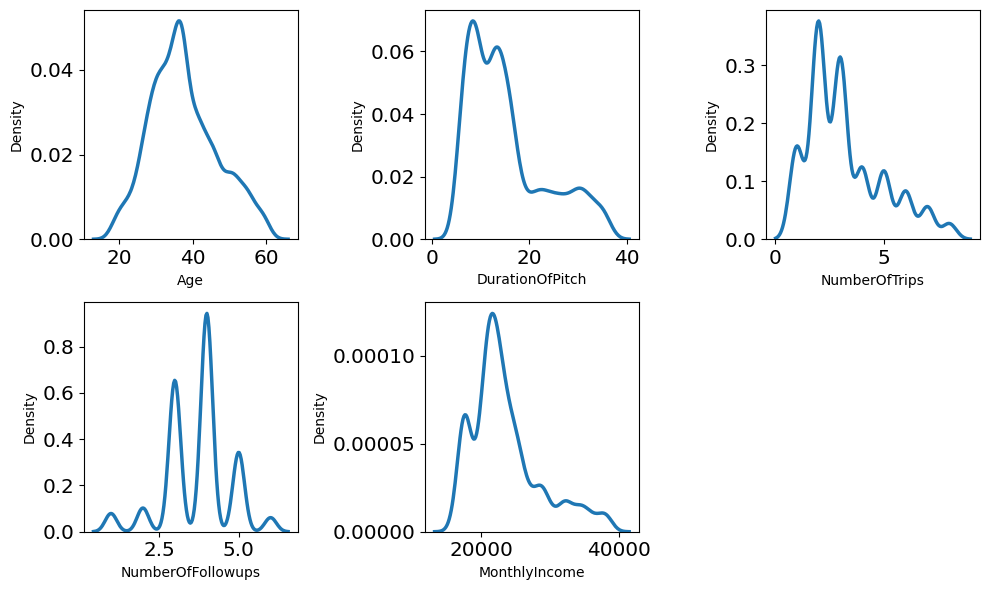

In [34]:
plt.figure(figsize=(10,6))
for i, col in enumerate(['Age','DurationOfPitch','NumberOfTrips','NumberOfFollowups','MonthlyIncome']):
  plt.subplot(2,3,i+1)
  sns.kdeplot(x=df_simp3[col])
  plt.xlabel(col)
  plt.tight_layout()



In [35]:
#Transformasi
df_simp3['DurationOfPitch'] = np.log(df_simp3['DurationOfPitch'])
df_simp3['NumberOfTrips'] = np.log(df_simp3['NumberOfTrips'])
df_simp3['MonthlyIncome'] = np.log(df_simp3['MonthlyIncome'])
df_simp3['NumberOfFollowups'] = np.log(df_simp3['NumberOfFollowups'])

# #Drop kolom (nilai asli)
# df = df_simp3.drop(columns='DurationOfPitch')
# df = df_simp3.drop(columns='NumberOfFollowups')
# df = df_simp3.drop(columns='NumberOfTrips')
# df = df_simp3.drop(columns='MonthlyIncome')

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#Normalization (outlier yang berjarak dekat)
df_simp3['Age_norm'] = MinMaxScaler().fit_transform(df_simp3['Age'].values.reshape(len(df_simp3), 1))

#Standardization (outlier yang berjarak jauh)
df_simp3['DOP_norm'] = StandardScaler().fit_transform(df_simp3['DurationOfPitch'].values.reshape(len(df_simp3), 1))
df_simp3['MI_std'] = StandardScaler().fit_transform(df_simp3['MonthlyIncome'].values.reshape(len(df_simp3), 1))

#Drop kolom (nilai asli)
df_simp3 = df_simp3.drop(columns='DurationOfPitch')
df_simp3 = df_simp3.drop(columns='Age')
# df_simp3 = df_simp3.drop(columns='NumberOfTrips')
df_simp3 = df_simp3.drop(columns='MonthlyIncome')

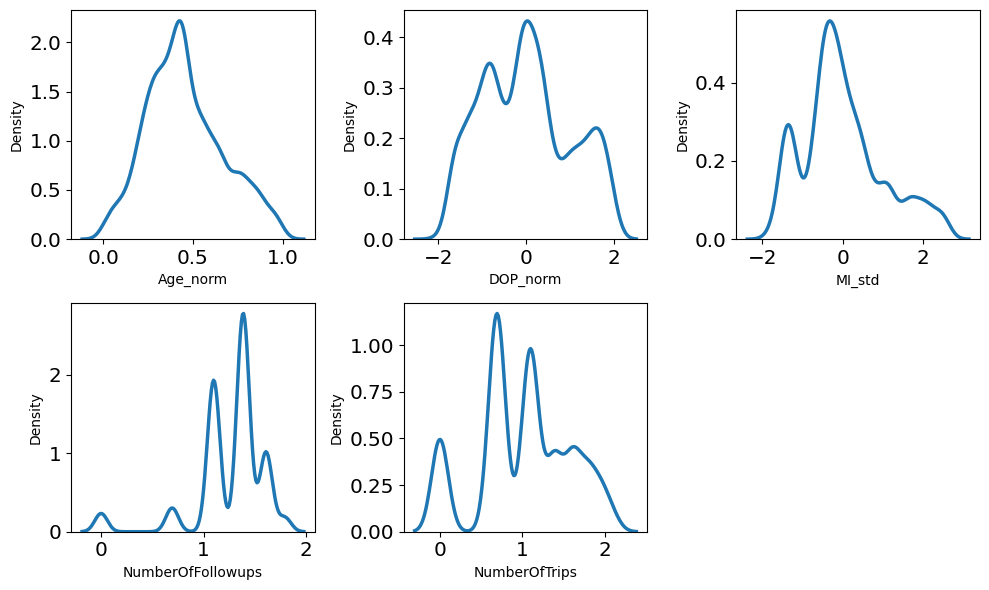

In [37]:
plt.figure(figsize=(10,6))
for i, col in enumerate(['Age_norm','DOP_norm','MI_std', 'NumberOfFollowups', 'NumberOfTrips']):
  plt.subplot(2,3,i+1)
  sns.kdeplot(x=df_simp3[col])
  plt.xlabel(col)
  plt.tight_layout()

In [38]:
df_simp3[['Age_norm', 'DOP_norm','MI_std', 'NumberOfFollowups', 'NumberOfTrips']].describe()

,Age_norm,DOP_norm,MI_std,NumberOfFollowups,NumberOfTrips
count,4878.000000,4.878000e+03,4.878000e+03,4878.000000,4878.000000
mean,0.455643,-3.161080e-16,-6.647910e-16,1.263905,1.018259
std,0.211738,1.000103e+00,1.000103e+00,0.337870,0.559555
min,0.000000,-1.988835e+00,-1.825741e+00,0.000000,0.000000
25%,0.302326,-8.116520e-01,-5.915465e-01,1.098612,0.693147
50%,0.441860,-7.519571e-02,-1.564394e-01,1.386294,1.098612
75%,0.581395,6.848225e-01,4.883490e-01,1.386294,1.386294
max,1.000000,1.964732e+00,2.588952e+00,1.791759,2.079442


### Feature Selection

In [39]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
df_feature = df_simp3.drop('ProdTaken',1)
sr_outcome = df_simp3['ProdTaken']

# Pisahkan fitur numerik yang telah diubah dengan fitur kategorikal
num_col = ['DOP_norm', 'NumberOfFollowups','NumberOfTrips','MI_std',
           'NumberOfChildrenVisiting', 'NumberOfPersonVisiting']
df_fenum = df_feature[num_col]

# Inisialisasi objek feature selector dengan metode chi-square test
selector1 = SelectKBest(score_func=f_classif, k=4)# Ubah nilai k sesuai kebutuhan

# Fit dan transformasikan data menggunakan selector
selected_fenum = selector1.fit_transform(df_fenum, sr_outcome)

# Dapatkan indeks fitur yang terpilih
selected_fenum_indices = selector1.get_support(indices=True)

# Dapatkan nama fitur yang terpilih
selected_fenum_names = df_fenum.columns[selected_fenum_indices]

# Tampilkan hasil
final_fenum = pd.DataFrame(selected_fenum, columns=selected_fenum_names)
final_fenum.columns

Index(['DOP_norm', 'NumberOfFollowups', 'MI_std', 'NumberOfPersonVisiting'], dtype='object')

In [40]:
# Pisahkan fitur numerik yang telah diubah dengan fitur kategorikal
cat_col = ['status_Divorced', 'status_Married', 'status_Unmarried', 'work_Large Business', 'work_Salaried', 'work_Small Business',
           'TypeofContact', 'CityTier', 'Gender', 'ProductPitched','PreferredPropertyStar', 'Passport','PitchSatisfactionScore','OwnCar','Designation']
df_fecat = df_feature[cat_col]

# Inisialisasi objek feature selector dengan metode chi-square test
selector = SelectKBest(score_func=chi2, k=10)  # Ubah nilai k sesuai kebutuhan

# Fit dan transformasikan data menggunakan selector
selected_fecat = selector.fit_transform(df_fecat, sr_outcome)

# Dapatkan indeks fitur yang terpilih
selected_fecat_indices = selector.get_support(indices=True)

# Dapatkan nama fitur yang terpilih
selected_fecat_names = df_fecat.columns[selected_fecat_indices]

# Tampilkan hasil
final_fecat = pd.DataFrame(selected_fecat, columns=selected_fecat_names)
final_fecat.columns

Index(['status_Divorced', 'status_Married', 'status_Unmarried',
       'work_Large Business', 'TypeofContact', 'CityTier', 'ProductPitched',
       'PreferredPropertyStar', 'Passport', 'Designation'],
      dtype='object')

In [41]:
df_simp3_final = pd.concat([final_fenum,final_fecat], axis=1)
# df_simp3 = df_simp3[col]
print(f'''feature hasil seleksi: {df_simp3_final.columns}, and {df_simp3_final.shape[1]}''')

feature hasil seleksi: Index(['DOP_norm', 'NumberOfFollowups', 'MI_std', 'NumberOfPersonVisiting',
       'status_Divorced', 'status_Married', 'status_Unmarried',
       'work_Large Business', 'TypeofContact', 'CityTier', 'ProductPitched',
       'PreferredPropertyStar', 'Passport', 'Designation'],
      dtype='object'), and 14


### Split Dataset

In [42]:
X = df_simp3_final
y = df_simp3['ProdTaken']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Jumlah train dataset  terdiri dari {len(X_train)} baris')
print(f'Jumlah class 0 : {sum(y_train==0)}')
print(f'Jumlah class 1 : {sum(y_train==1)}\n')

print(f'Jumlah test dataset terdiri dari {len(X_test)} baris')
print(f'Jumlah class 0 : {sum(y_test==0)}')
print(f'Jumlah class 1 : {sum(y_test==1)}\n')

### Class Imbalace

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5,random_state=42)
X_train, y_train =smote.fit_resample(X_train, y_train)

In [ ]:
print(f'Jumlah train dataset  terdiri dari {len(X_train)} baris')
print(f'Jumlah class 0 : {sum(y_train==0)}')
print(f'Jumlah class 1 : {sum(y_train==1)}\n')